# Explore here

In [8]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# My dataset
dt_all = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
print(dt_all.head(5))


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [9]:
dt_all.shape

(48895, 16)

In [10]:
dt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Datos numericos enteros: id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365.
- Datos numericos decimales: latitude, longitude, reviews_per_month.
- Datos Categoricos: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review.

In [11]:
print('Datos duplicados en name: ' + str(dt_all['name'].duplicated().sum()))
print('Datos duplicados en host_id: ' + str(dt_all['host_id'].duplicated().sum()))
print('Datos duplicados en id: ' + str(dt_all['id'].duplicated().sum()))

Datos duplicados en name: 989
Datos duplicados en host_id: 11438
Datos duplicados en id: 0


In [12]:
dt_all = dt_all.drop_duplicates(subset = dt_all.columns.difference(['id','host_id','name']))
print(dt_all.shape)
dt_all.head()

(48895, 16)


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [13]:
if dt_all.duplicated().sum():
    dt_all = dt_all.drop_duplicates()
print(dt_all.shape)
dt_all.head()

(48895, 16)


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

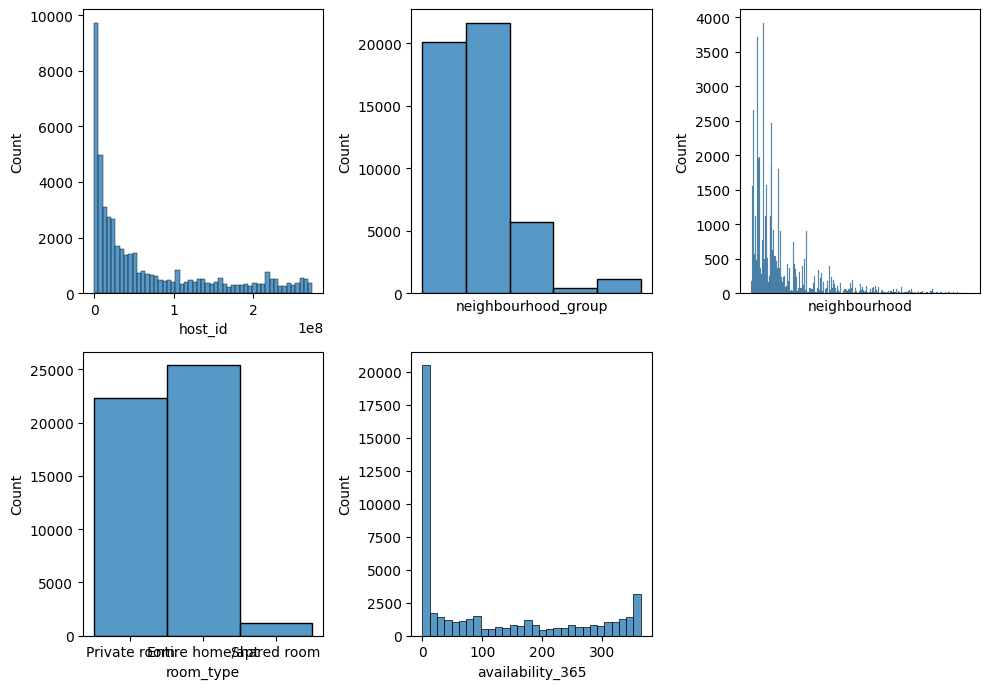

In [14]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = dt_all, x = "host_id")
sns.histplot(ax = axis[0, 1], data = dt_all, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0, 2], data = dt_all, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = dt_all, x = "room_type")
sns.histplot(ax = axis[1, 1], data = dt_all, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Variables Categoricas. 

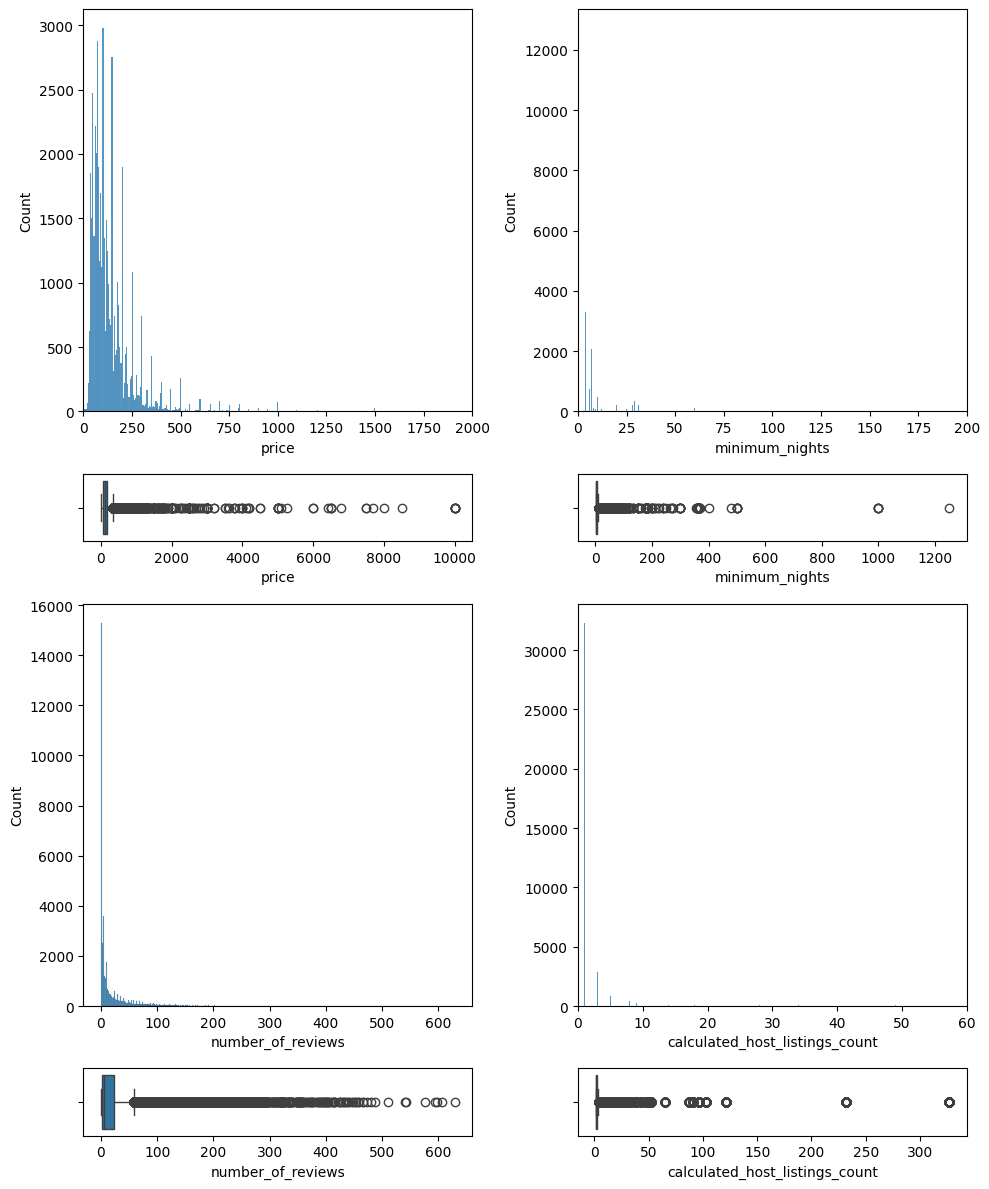

In [15]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# price
sns.histplot(ax = axis[0, 0], data = dt_all, x = "price").set_xlim(0,2000) # Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 0], data = dt_all, x = "price")

# Mínimo de noches
sns.histplot(ax = axis[0, 1], data = dt_all, x = "minimum_nights").set_xlim(0,200)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 1], data = dt_all, x = "minimum_nights")

# Número de reviews
sns.histplot(ax = axis[2, 0], data = dt_all, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = dt_all, x = "number_of_reviews")

# 
sns.histplot(ax = axis[2, 1], data = dt_all, x = "calculated_host_listings_count").set_xlim(0,60)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[3, 1], data = dt_all, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

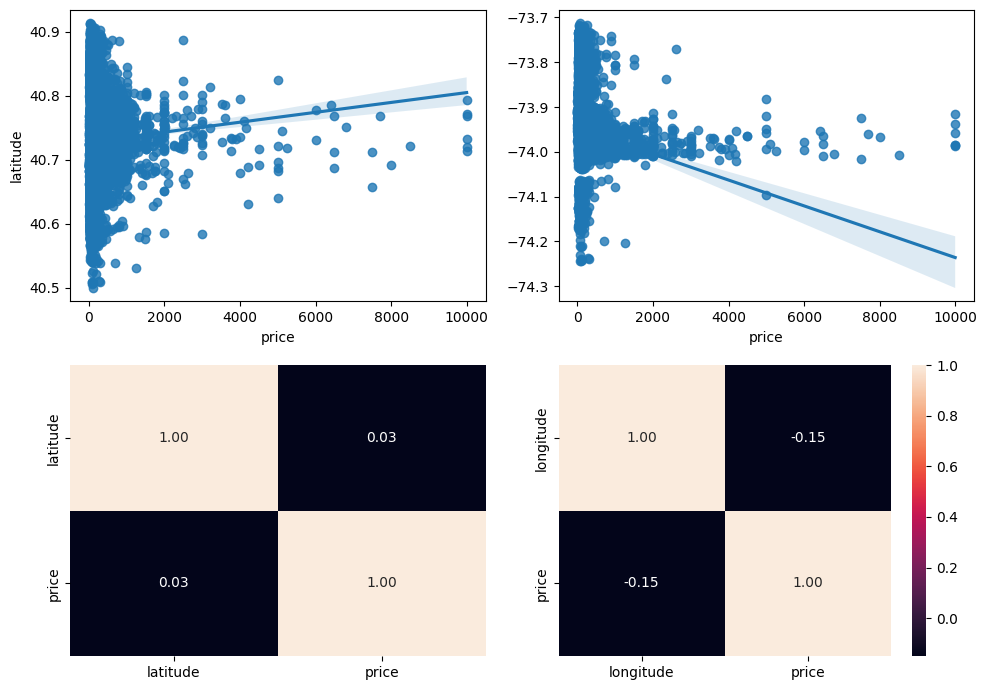

In [22]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dt_all, x = "price", y = "latitude")
sns.heatmap(dt_all[["latitude", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dt_all, x = "price", y = "longitude").set(ylabel=None)
sns.heatmap(dt_all[["longitude", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

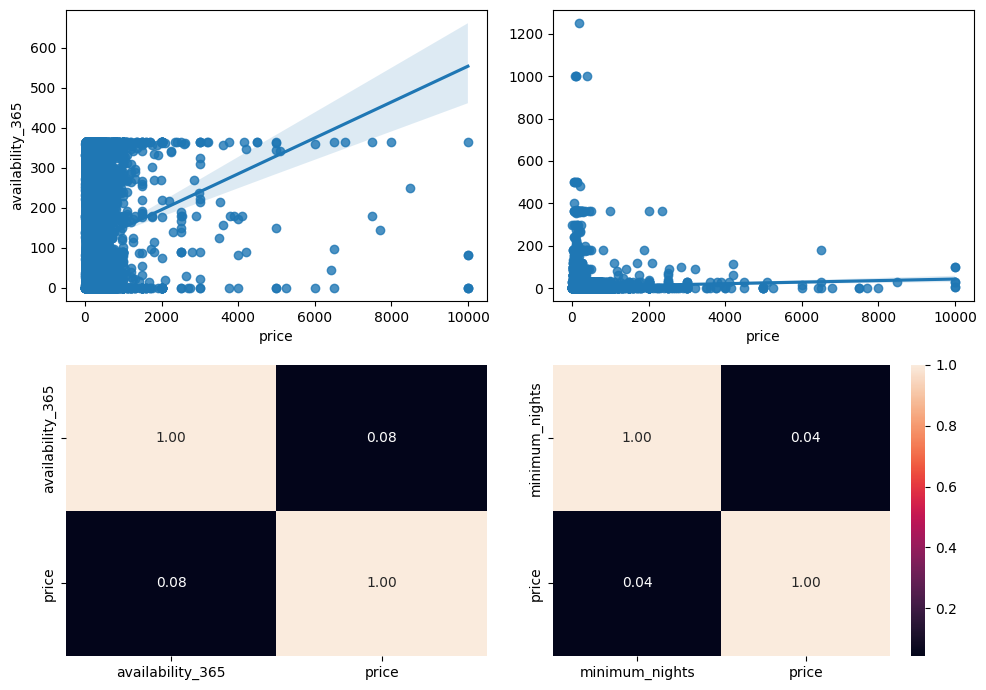

In [19]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dt_all, x = "price", y = "availability_365")
sns.heatmap(dt_all[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dt_all, x = "price", y = "minimum_nights").set(ylabel=None)
sns.heatmap(dt_all[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

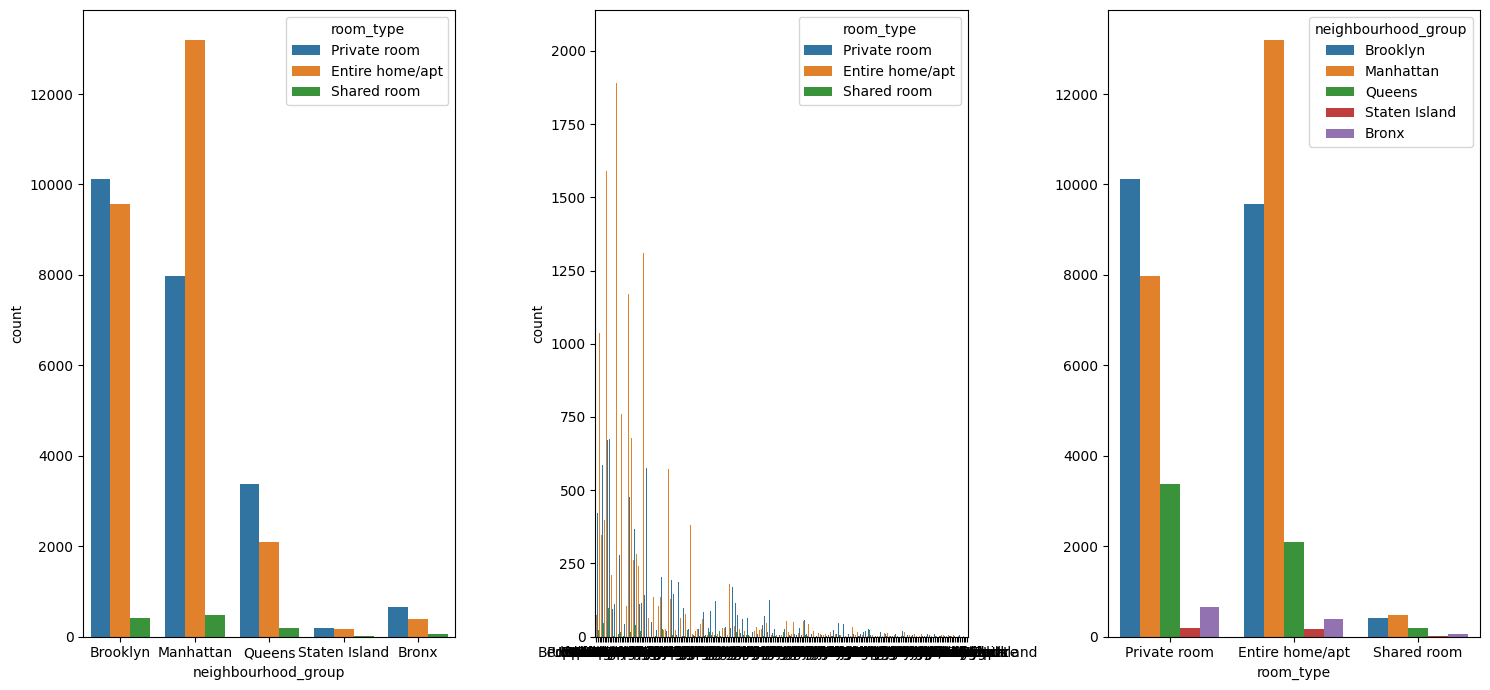

In [35]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = dt_all, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = dt_all, x = "neighbourhood", hue = "room_type").set(xlabel = None)
sns.countplot(ax = axis[2], data = dt_all, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)


plt.tight_layout()
# fig.delaxes(axis[1, 2])

plt.show()

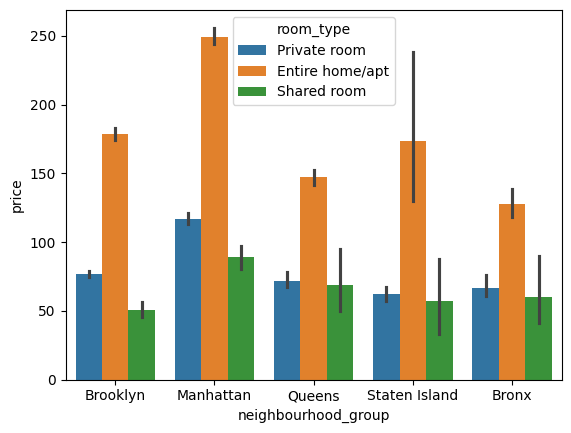

In [ ]:
sns.barplot(data = dt_all, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.show()

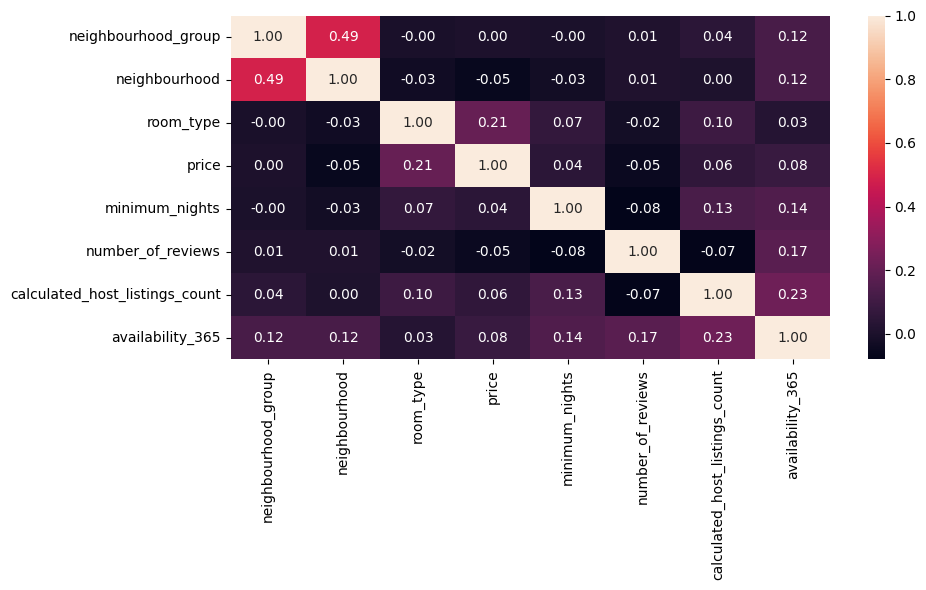

In [43]:
dt_all["room_type"] = pd.factorize(dt_all["room_type"])[0]
dt_all["neighbourhood_group"] = pd.factorize(dt_all["neighbourhood_group"])[0]
dt_all["neighbourhood"] = pd.factorize(dt_all["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dt_all[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights","number_of_reviews", 
                    "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

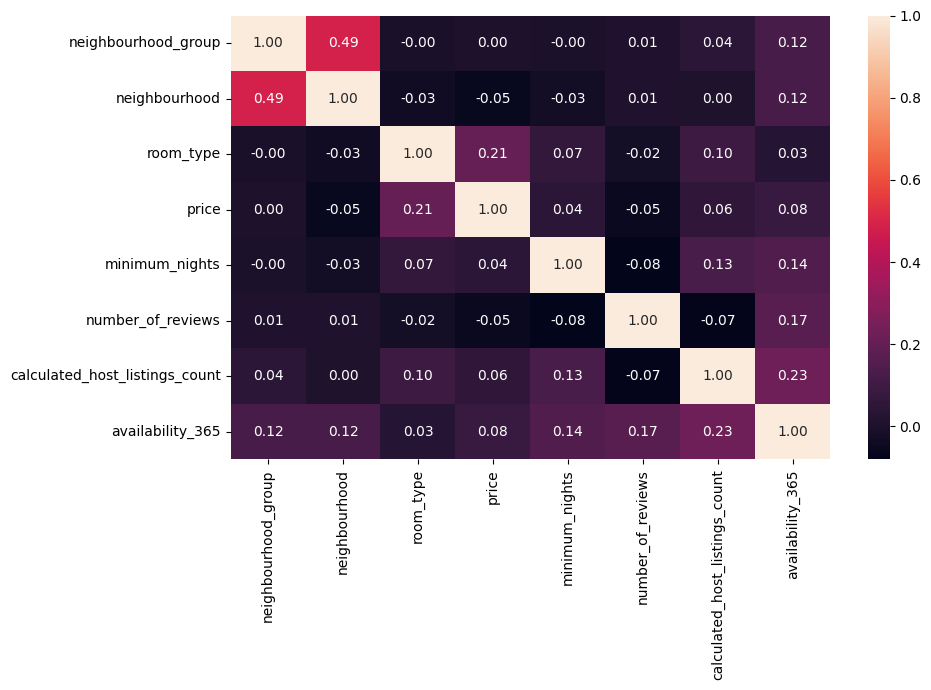

In [46]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(dt_all[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights","number_of_reviews", 
                    "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

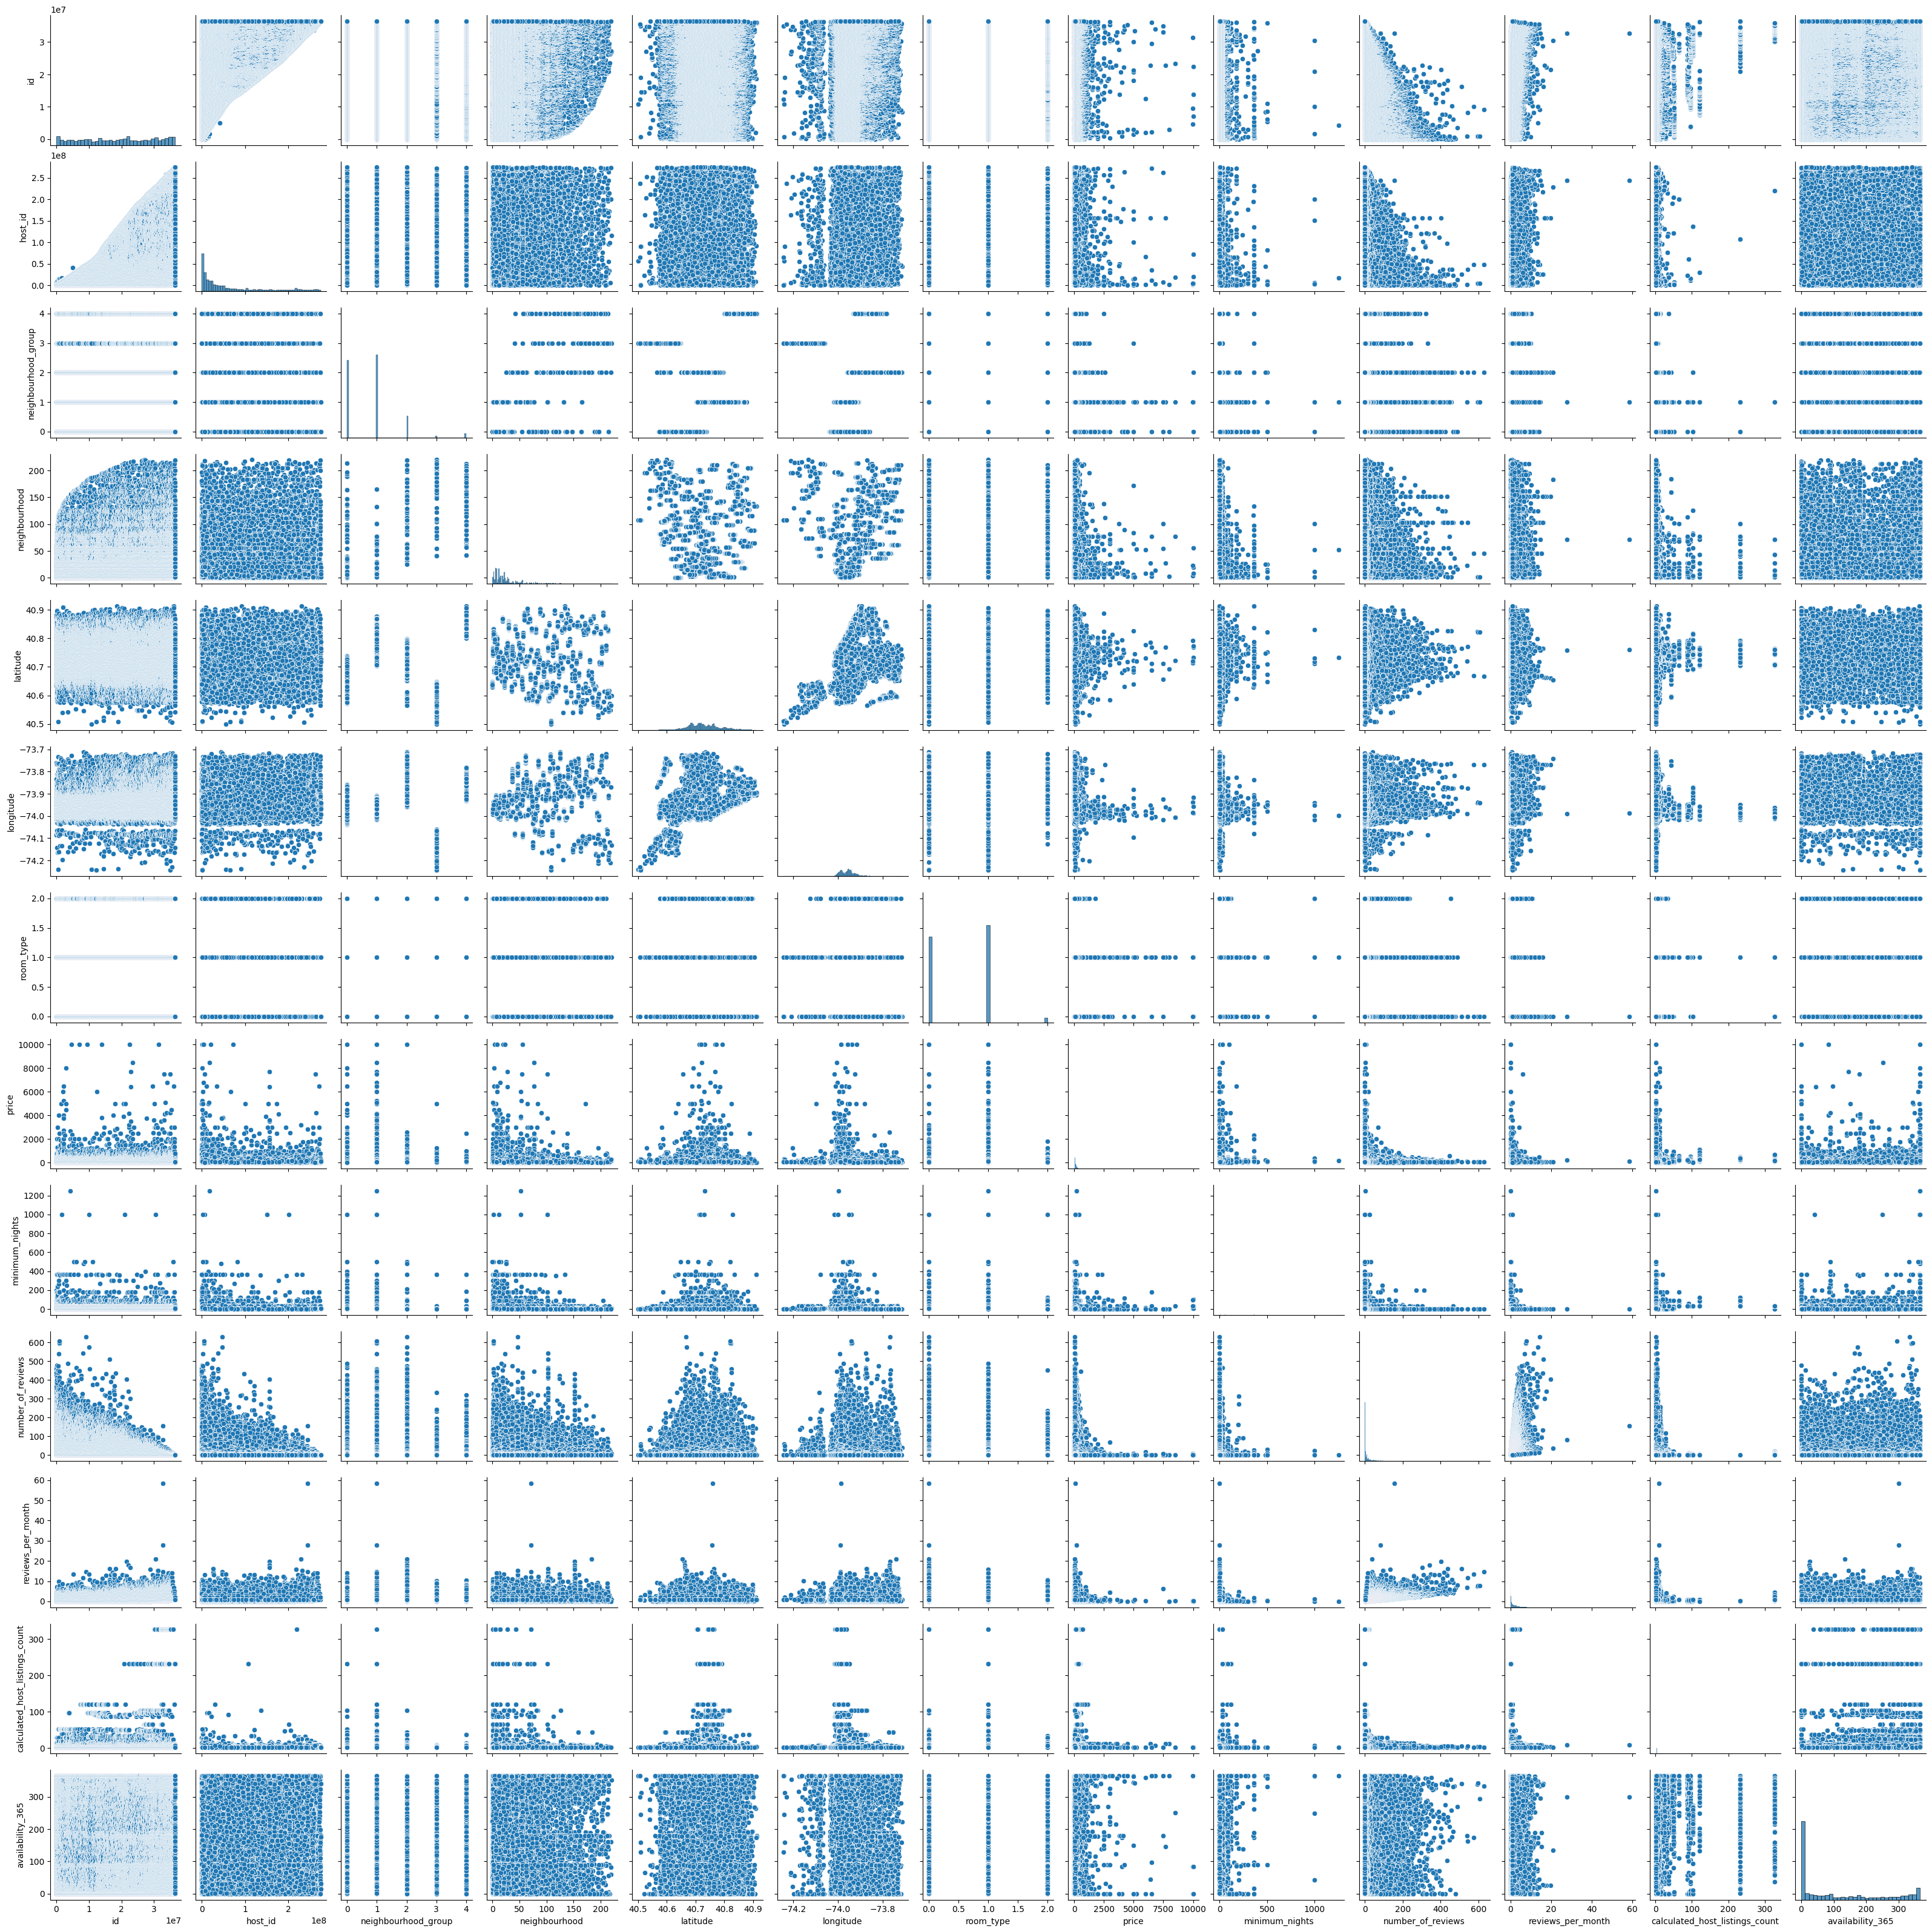

In [47]:
sns.pairplot(data = dt_all)

In [51]:
round(dt_all.describe(),2)

id       host_id  neighbourhood_group  neighbourhood  \
count     48895.00  4.889500e+04             48895.00       48895.00   
mean   19017143.24  6.762001e+07                 0.79          29.89   
std    10983108.39  7.861097e+07                 0.84          34.68   
min        2539.00  2.438000e+03                 0.00           0.00   
25%     9471945.00  7.822033e+06                 0.00           7.50   
50%    19677284.00  3.079382e+07                 1.00          19.00   
75%    29152178.50  1.074344e+08                 1.00          37.00   
max    36487245.00  2.743213e+08                 4.00         220.00   

       latitude  longitude  room_type     price  minimum_nights  \
count  48895.00   48895.00   48895.00  48895.00        48895.00   
mean      40.73     -73.95       0.57    152.72            7.03   
std        0.05       0.05       0.54    240.15           20.51   
min       40.50     -74.24       0.00      0.00            1.00   
25%       40.69     -73.98       0.00     69.00            1.00   
50%       40.72     -73.96       1.00    106.00            3.00   
75%       40.76     -73.94       1.00    175.00            5.00   
max       40.91     -73.71       2.00  10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           38843.00                        48895.00   
mean               23.27               1.37                            7.14   
std                44.55               1.68                           32.95   
min                 0.00               0.01                            1.00   
25%                 1.00               0.19                            1.00   
50%                 5.00               0.72                            1.00   
75%                24.00               2.02                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dt_all, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = dt_all, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = dt_all, y = "Age")
sns.boxplot(ax = axis[1, 0], data = dt_all, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = dt_all, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = dt_all, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = dt_all, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = dt_all, y = "Embarked_n")

plt.tight_layout()

plt.show()